## FRB Traffic Light Map

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cPickle as pkl
import pandas as pd
import glob
import os

%matplotlib inline

In [2]:
#CRITERIAPATH = '/home/griffin/local/Documents/manuscripts/terrestrial-frb-letter/verification/' # aslx
CRITERIAPATH = '/home/griffin/Documents/Manuscripts/terrestrial-frb-letter/verification/' # watermark

TerrLblDict = {'ALFAGAIN':'ALFA Gain',
               'B1859_03':'B1859+03',
               'LOFARRADAR':'LOFAR-UK RADAR',
               'LOWSNR':'Low S/N',
               'Perytons':'Perytons',
               'XAOREPEATER':'XAO Repeater'}

colOrder = ['SNR', 'flux', 'pulsewidth', 'highResStruct', 'multicomp', 'broadband',\
            'spectralIndex', 'scattering', 'scintillation', 'polarization',\
            #'compDMfrac', 'snrDMfrac',\
            'DMexcess',\
            'dispersionRelation', 'dmSpace', 'repeats', 'lowSNRsearch', 'rfi',\
            #'sysNoise', 'correctFeed', 'obsLog', 'electronics',\
            'telState',\
            'bandpass', 'gain', 'lowAltitude',\
            'multiBeam', 'TAB', 'interferometric', 'multiSite'\
            #'empty',
            #'dataSingleBeam', 'dataMultiBeam',\
            #'dataTAB', 'dataInterferometric', 'dataMultiSite', 'dataVoltages']
           ]

CritLblDict = {
    'DMexcess':'DM Excess',
    'SNR':'S/N',
    'flux':'Flux',
    'pulsewidth':'Pulse Width',
    'multicomp':'Multiple Components',
    'polarization':'Polarization',
    'broadband':'Broad-band',
    'spectralIndex':'Spectral Index',
    'highResStruct':'High-resolution Structure',
    'scattering':'Scattering',
    'scintillation':'Scintillation',
    'dmSpace':'DM Trial Space',
    'dispersionRelation':'Dispersion Relation',
    'bandpass':'Bandpass',
    'lowAltitude':'Low-altitude Pointing',
    'telState':'Telescope State',
    #'sysNoise':'System Noise',
    #'correctFeed':'Correct Feed Position',
    #'obsLog':'Observation Log',
    #'electronics':'System Electronics',
    'repeats':'Repeats',
    'gain':'Gain Stability',
    'lowSNRsearch':'Low-S/N DM Search',
    'rfi':'RFI Environment',
    'multiBeam':'Multi-Beam Obs',
    'TAB':'Tied-Array Beam Obs',
    'interferometric':'Interferometric Obs',
    'multiSite':'Multi-Site Obs',
    #'empty':'',
    #'dataSingleBeam':'Single-Beam Data',
    #'dataMultiBeam':'Mulit-Beam Data',
    #'dataTAB':'Tied-Array Beam Data',
    #'dataInterferometric':'Interferometric Data',
    #'dataMultiSite':'Multi-Site Data',
    #'dataVoltages':'Voltage Data'
}

In [3]:
criteriaFiles = glob.glob(CRITERIAPATH + '*.pkl')

FRBCrits = {}
TerrCrits = {}

for cf in criteriaFiles:
    FRBName = os.path.basename(cf).split('.')[1]
    print cf
    critDict = pkl.load(open(cf, 'rb'))
    
    if FRBName.startswith('FRB'):
        FRBCrits['FRB '+FRBName[3:]] = pd.Series(critDict)
    else:
        if FRBName in TerrLblDict.keys():
            TerrCrits[TerrLblDict[FRBName]] = pd.Series(critDict)
        else:
            TerrCrits[FRBName] = pd.Series(critDict)

FRBdf = pd.DataFrame(FRBCrits).transpose()
FRBdf.sort_index(inplace=True)
FRBdf['empty'] = np.nan
FRBdf = FRBdf[colOrder]
FRBdf.rename(columns=CritLblDict, inplace=True)

Terrdf = pd.DataFrame(TerrCrits).transpose()
Terrdf['empty'] = np.nan
Terrdf = Terrdf[colOrder]
Terrdf.rename(columns=CritLblDict, inplace=True)

#emptydf = pd.DataFrame(np.nan, index=[''], columns=colOrder)
emptydf = pd.DataFrame('EMPTY', index=[''], columns=colOrder)
emptydf.rename(columns=CritLblDict, inplace=True)

/home/griffin/Documents/Manuscripts/terrestrial-frb-letter/verification/criteria.FRB130729.pkl
/home/griffin/Documents/Manuscripts/terrestrial-frb-letter/verification/criteria.ALFAGAIN.pkl
/home/griffin/Documents/Manuscripts/terrestrial-frb-letter/verification/criteria.LOFARRADAR.pkl
/home/griffin/Documents/Manuscripts/terrestrial-frb-letter/verification/criteria.B1859_03.pkl
/home/griffin/Documents/Manuscripts/terrestrial-frb-letter/verification/criteria.FRB121102.pkl
/home/griffin/Documents/Manuscripts/terrestrial-frb-letter/verification/criteria.LOWSNR.pkl
/home/griffin/Documents/Manuscripts/terrestrial-frb-letter/verification/criteria.FRB090625.pkl
/home/griffin/Documents/Manuscripts/terrestrial-frb-letter/verification/criteria.FRB180301.pkl
/home/griffin/Documents/Manuscripts/terrestrial-frb-letter/verification/criteria.FRB140514.pkl
/home/griffin/Documents/Manuscripts/terrestrial-frb-letter/verification/criteria.FRB130626.pkl
/home/griffin/Documents/Manuscripts/terrestrial-frb-le

In [4]:
numFRBdf = FRBdf.copy()
numTerrdf = Terrdf.copy()
numemptydf = emptydf.copy()

for strIdx, strVal in enumerate(['POSITIVE', 'NEUTRAL', 'UNKNOWN', 'NEGATIVE', 'CRITICAL', 'NOTVALID', 'EMPTY']):
    numFRBdf.replace(to_replace=strVal, value=strIdx, inplace=True)
    numTerrdf.replace(to_replace=strVal, value=strIdx, inplace=True)
    numemptydf.replace(to_replace=strVal, value=strIdx, inplace=True)

In [5]:
#print pd.DataFrame(np.nan, index=[''], columns=colOrder)
#numFRBdf = pd.concat([numFRBdf, emptydf])
numFRBdf = pd.concat([numFRBdf, numemptydf])
numDf = pd.concat([numFRBdf, numTerrdf])

In [6]:
from matplotlib import colors

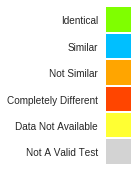

In [7]:
cmapLbl = colors.ListedColormap(['chartreuse', 'deepskyblue', '#FFFF33', 'orange', 'orangered', 'lightgrey'])

fig = plt.figure(figsize=(2.75,2.5)) # (width, height)

tempDf = pd.DataFrame(index=['Identical', 'Similar', 'Not Similar', 'Completely Different', 'Data Not Available', 'Not A Valid Test'], \
                      columns=[''], data=[0,1,3,4,2,5])

sns.heatmap(tempDf, cmap=cmapLbl, cbar=False, square=True, linewidths=1)

plt.tight_layout()
#plt.savefig('FRBheatmap_key.pdf')

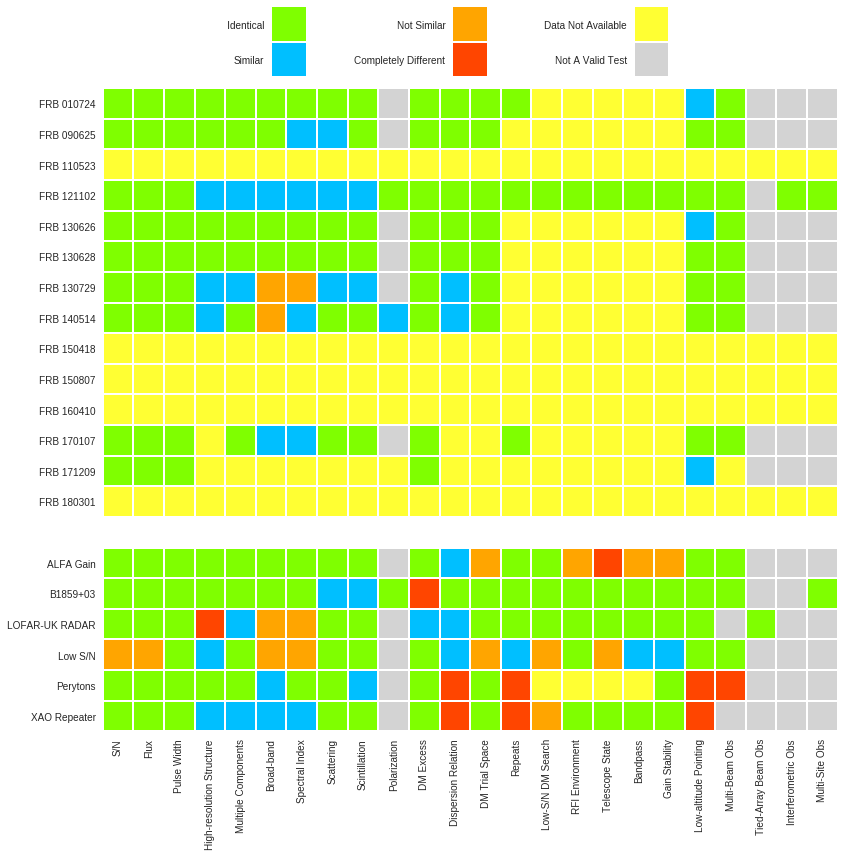

In [8]:
# criteria
#POSTIVE - green
#NEUTRAL - blue
#UNKNOWN - yellow
#NEGATIVE - orange
#CRITICAL - red
#NOTVALID - grey

# data
# POSITIVE - green - desirable data
# NEUTRAL - blue - limited/minimum data
# NEGATIVE - orange - missing some data
# CRITICAL - red - no data
# NOTVALID - grey - not valid data type for observation setup

cmap = colors.ListedColormap(['chartreuse', 'deepskyblue', '#FFFF33', 'orange', 'orangered', 'lightgrey', 'white'])

fig = plt.figure(figsize=(13,12)) # (width, height)

#plt.subplot2grid((5,14), (0,3), colspan=11, rowspan=5)
##plt.subplot2grid((5,14), (0,0), colspan=11, rowspan=5)
#sns.heatmap(numDf, cmap=cmap, cbar=False, square=True, linewidths=1)
#fig.tight_layout()

#plt.subplot2grid((5,14), (2,0), colspan=3, rowspan=1)
##plt.subplot2grid((5,14), (2,11), colspan=3, rowspan=1)
#ax = sns.heatmap(tempDf, cmap=cmapLbl, cbar=False, square=True, linewidths=1)
#fig.tight_layout()

plt.subplot2grid((9,5), (1,0), colspan=5, rowspan=8)
sns.heatmap(numDf, cmap=cmap, cbar=False, square=True, linewidths=1)
fig.tight_layout()

plt.subplot2grid((9,5), (0,1), colspan=1, rowspan=1)
tempDf = pd.DataFrame(index=['   Identical', 'Similar'], columns=[''], data=[0,1])
ax = sns.heatmap(tempDf, cmap=colors.ListedColormap(['chartreuse', 'deepskyblue']), cbar=False, square=True, linewidths=1)
fig.tight_layout()

plt.subplot2grid((9,5), (0,2), colspan=1, rowspan=1)
tempDf = pd.DataFrame(index=['Not Similar', 'Completely Different'], columns=[''], data=[0,1])
ax = sns.heatmap(tempDf, cmap=colors.ListedColormap(['orange', 'orangered']), cbar=False, square=True, linewidths=1)
fig.tight_layout()

plt.subplot2grid((9,5), (0,3), colspan=1, rowspan=1)
tempDf = pd.DataFrame(index=['Data Not Available', 'Not A Valid Test'], columns=[''], data=[0,1])
ax = sns.heatmap(tempDf, cmap=colors.ListedColormap(['#FFFF33', 'lightgrey']), cbar=False, square=True, linewidths=1)
fig.tight_layout()

plt.savefig('FRBheatmap.pdf')